<a href="https://colab.research.google.com/github/mars-orbiter/GAIA/blob/main/Constellations_with_Gaia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [51]:
#accessing the csv file and displaying it
dataset = pd.read_csv('https://raw.githubusercontent.com/mars-orbiter/GAIA/main/constellation.csv', encoding='utf-8')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dataset)

                            Name          RA        Dec   parallax  \
0                   Theta Cephei  307.395779  62.994049  23.481038   
1                     Eta Cephei  311.323206  61.842419  69.597554   
2                      Alderamin  319.646337  62.585796        NaN   
3                         Alfirk  322.165053  70.560719        NaN   
4         Herschel's Garnet Star  325.876944  58.780028   0.119024   
5                      Nu Cephei  326.362155  61.120797   0.932088   
6                    Zeta Cephei  332.713770  58.201285   3.297198   
7                 Epsilon Cephei  333.762613  57.043803  38.159770   
8                   Delta Cephei  337.292885  58.415208   3.555064   
9   Rho-2 Cephei/ Al kalb al rai  337.470823  78.824194  13.603749   
10                   Iota Cephei  342.419347  66.199850  27.286898   
11                     Pi Cephei  346.974507  75.387361  12.145783   
12     Gamma Cephei/ Alrai/Errai  354.835781  77.633125  72.516692   

    parallax_err.  

In [53]:
# accessing the different columns of the csv dataset I made above
dataset.columns = ["Name","RA","Dec","parallax","parallax_err.","pmra","pmdec","App_mag","Distance_ly"]

#storing values for each column into a separate list
Name = np.array(dataset.Name)
RA = np.array(dataset.RA)
Dec = np.array(dataset.Dec)
Distance = np.array(dataset.Distance_ly)
pmRA = np.array(dataset.pmra)
pmDec = np.array(dataset.pmdec)

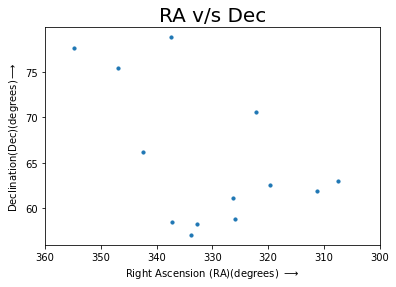

In [58]:
#plotting a scatter plot for RA and Dec

plt.scatter(RA,Dec, s=10,)
plt.xlabel('Right Ascension (RA)(degrees) $\longrightarrow$')
plt.ylabel('Declination(Dec)(degrees)$\longrightarrow$')
plt.xlim(360,300)
plt.title('RA v/s Dec', fontsize = 20)
plt.show()

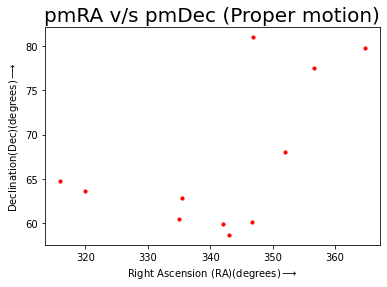

In [40]:
#plotting a scatter plot for RA and Dec (proper motion)

t = 100000
pmRA = RA + ((pmRA*t)/3600000) 
pmDec = Dec +((pmDec*t)/3600000)

plt.scatter(pmRA,pmDec,color = 'red', s = 10)
plt.xlabel('Right Ascension (RA)(degrees)$\longrightarrow$')
plt.ylabel('Declination(Dec)(degrees)$\longrightarrow$')
plt.title('pmRA v/s pmDec (Proper motion)', fontsize = 20)
plt.show()

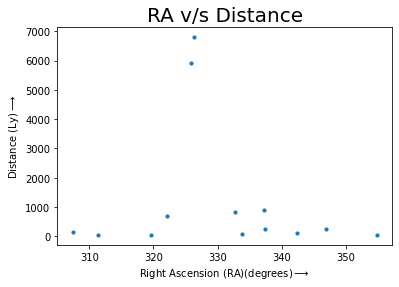

In [42]:
#plotting a scatter plot for RA and Distance

plt.scatter(RA,Distance, s=10)
plt.xlabel('Right Ascension (RA)(degrees)$\longrightarrow$')
plt.ylabel('Distance (Ly)$\longrightarrow$')
plt.title('RA v/s Distance', fontsize = 20)
plt.show()

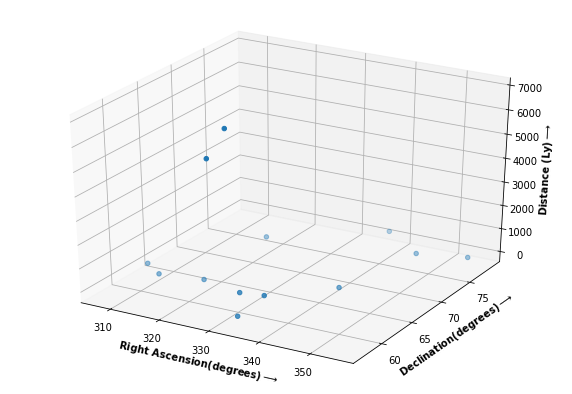

In [43]:
# Function to create 3D scatter plot
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Create Plot
ax.set_xlabel('Right Ascension(degrees)$\longrightarrow$', fontweight ='bold')
ax.set_ylabel('Declination(degrees)$\longrightarrow$', fontweight ='bold')
ax.set_zlabel('Distance (Ly)$\longrightarrow$', fontweight ='bold')
ax.scatter3D(RA,Dec,Distance)
plt.show()

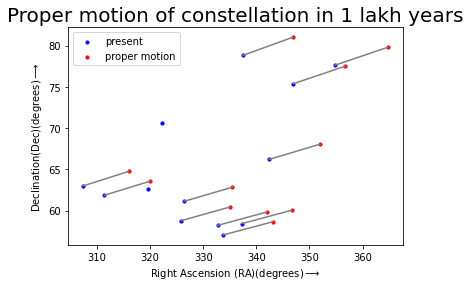

In [49]:
t = 100000
pmRA = RA + ((pmRA*t)/3600000) 
pmDec = Dec +((pmDec*t)/3600000)

#plotting a scatter plot for RA and Dec
plt.scatter(RA,Dec,color = 'blue', s=10, label = 'present')
#---------------------------------------------------------------------
#plotting a scatter plot for RA and Dec (proper motion)
plt.scatter(pmRA,pmDec,color = 'red', s = 10, label = 'proper motion')

#joining the stars together to show their movement

ra_val= np.array([RA,pmRA])
dec_val=np.array([Dec,pmDec])
plt.plot(ra_val, 
         dec_val, 
         color='gray')
#plotting
plt.xlabel('Right Ascension (RA)(degrees)$\longrightarrow$')
plt.ylabel('Declination(Dec)(degrees)$\longrightarrow$')
plt.title('Proper motion of constellation in 1 lakh years', fontsize = 20)
plt.legend()
plt.show()

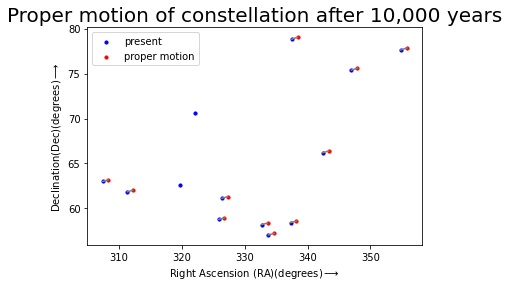

In [48]:
t = 10000
pmRA = RA + ((pmRA*t)/3600000) 
pmDec = Dec +((pmDec*t)/3600000)

#plotting a scatter plot for RA and Dec
plt.scatter(RA,Dec,color = 'blue', s=10, label = 'present')
#---------------------------------------------------------------------
#plotting a scatter plot for RA and Dec (proper motion)
plt.scatter(pmRA,pmDec,color = 'red', s = 10, label = 'proper motion')

#joining the stars together to show their movement

ra_val= np.array([RA,pmRA])
dec_val=np.array([Dec,pmDec])
plt.plot(ra_val, 
         dec_val, 
         color='gray')
#plotting
plt.xlabel('Right Ascension (RA)(degrees)$\longrightarrow$')
plt.ylabel('Declination(Dec)(degrees)$\longrightarrow$')
plt.title('Proper motion of constellation after 10,000 years', fontsize = 20)
plt.legend()
plt.show()